# Predict Customer Clicked Ads Classification By Using Machine Learning

### **Import Libraries and Settings**

In [1]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Settings of dataframe display
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


## Load Dataset

In [2]:
df = pd.read_csv('Clicked Ads Dataset.csv')

In [3]:
df.sample(10)

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
258,258,83.47,39,451134390.0,226.11,Perempuan,5/15/2016 20:48,No,Batam,Kepulauan Riau,Bank
831,831,42.83,34,380273110.0,132.38,Laki-Laki,4/23/2016 9:42,Yes,Pontianak,Kalimantan Barat,Bank
18,18,54.70,36,217612780.0,NaN,Laki-Laki,2/13/2016 7:53,Yes,Makassar,Sulawesi Selatan,Travel
907,907,87.18,31,408015020.0,193.60,Perempuan,1/31/2016 5:12,No,Medan,Sumatra Utara,Otomotif
50,50,73.18,23,430683750.0,196.71,Laki-Laki,4/4/2016 7:07,No,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Food
483,483,50.60,30,239337910.0,129.88,Laki-Laki,5/3/2016 12:57,Yes,Palembang,Sumatra Selatan,Finance
142,142,55.60,44,461676320.0,124.38,Laki-Laki,6/14/2016 11:59,Yes,Bekasi,Jawa Barat,Finance
445,445,73.72,32,364980280.0,256.40,Laki-Laki,3/18/2016 2:39,No,Malang,Jawa Timur,Fashion
752,752,70.61,28,505082760.0,190.12,Perempuan,4/16/2016 5:24,No,Pontianak,Kalimantan Barat,Food
746,746,66.80,29,417782120.0,248.51,Perempuan,7/11/2016 13:23,Yes,Palembang,Sumatra Selatan,House


In [4]:
df.shape

(1000, 11)

## Initial Transformation

In [5]:
# Drop index column
df.drop(columns='Unnamed: 0', inplace=True)

# Rename column name for and maintain column name similarity
df.rename(columns={'Male': 'Gender',
                   'Timestamp': 'Visit Time',
                   'city' : 'City',
                   'province' : 'Province',
                   'category' : 'Category'}, inplace=True)

# Re-arrange column (target 'Clicked on Ad' at the end --> personal preference)
df_1 = df.drop(columns='Clicked on Ad')
df_2 = df['Clicked on Ad']
df = pd.concat([df_1, df_2], axis='columns')

# Other way to re-arrange column
# df = df[[col for col in df if col != 'Clicked on Ad'] + ['Clicked on Ad']]

In [6]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Visit Time,City,Province,Category,Clicked on Ad
606,69.50,26,478442930.0,203.84,Perempuan,2/27/2016 13:51,Jakarta Utara,Daerah Khusus Ibukota Jakarta,Health,No
223,60.94,41,538256880.0,154.97,Perempuan,2/14/2016 7:30,Bandung,Jawa Barat,Food,Yes
236,76.77,36,408438870.0,123.51,Perempuan,5/4/2016 0:01,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Bank,Yes
716,39.96,35,377292230.0,138.52,Laki-Laki,2/28/2016 23:21,Depok,Jawa Barat,Food,Yes
872,70.05,33,528924550.0,203.44,Perempuan,3/24/2016 17:48,Jakarta Barat,Daerah Khusus Ibukota Jakarta,House,No
699,73.88,29,441768180.0,233.61,Perempuan,1/4/2016 6:37,Bandung,Jawa Barat,Fashion,No
309,54.92,54,167827450.0,161.16,Perempuan,6/13/2016 13:59,Depok,Jawa Barat,Finance,Yes
361,62.14,41,415785230.0,110.93,Laki-Laki,1/23/2016 18:59,Batam,Kepulauan Riau,Otomotif,Yes
600,84.00,48,328079710.0,136.21,Laki-Laki,4/17/2016 5:08,Tangerang,Banten,House,Yes
933,36.73,34,327161380.0,149.79,Laki-Laki,6/27/2016 1:56,Tangerang Selatan,Banten,Food,Yes


In [10]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage (%), Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage (%),Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,13,1.3,0,890,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,13,1.3,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,11,1.1,0,955,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,3,0.3,0,2,"[Perempuan, Laki-Laki, nan]"
5,Visit Time,object,0,0.0,0,997,"[3/27/2016 0:53, 4/4/2016 1:39, 3/13/2016 20:35, 1/10/2016 2:31, 6/3/2016 3:36]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


**Feature Descriptions**

- `Daily Time Spent on Site`: Time spent on the site (Minutes)
- `Age`: Age of the customer
- `Area Income`: The total income of customer in an area
- `Daily Internet Usage`: Time spent on the internet (Minutes)
- `Gender`: Gender of the customer
- `Visit Time`: Time the customer visit on the website
- `City`: City of customer's residence
- `Province`: Province of customer's residence
- `Category`: Product category
- `Clicked on Ad`: Whether the customer clicked the ad or not

In [11]:
# Data type correction for Visit Time
df['Visit Time'] = pd.to_datetime(df['Visit Time'])

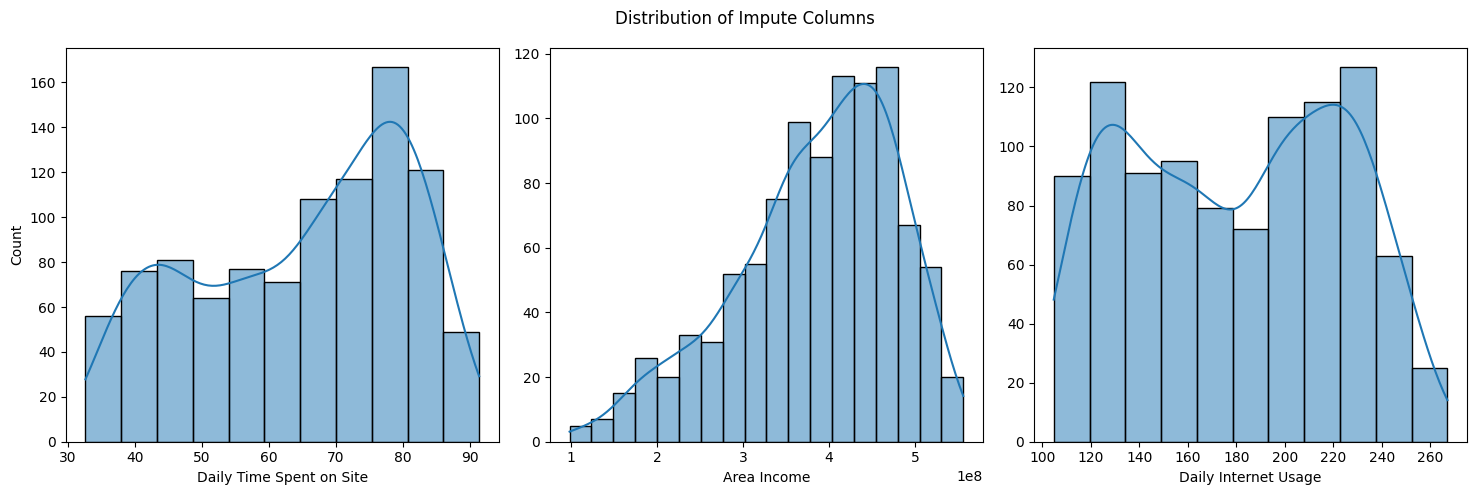

In [8]:
# Checking distribution in columns with missing value for proper imputation method
impute_col = ['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage']

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot histograms for each column
for i, col in enumerate(impute_col):
    sns.histplot(data=df, x=col, kde=True, ax=ax[i])
    if i != 0:
        ax[i].set_ylabel(None)

plt.suptitle('Distribution of Impute Columns')
plt.tight_layout()
plt.show()

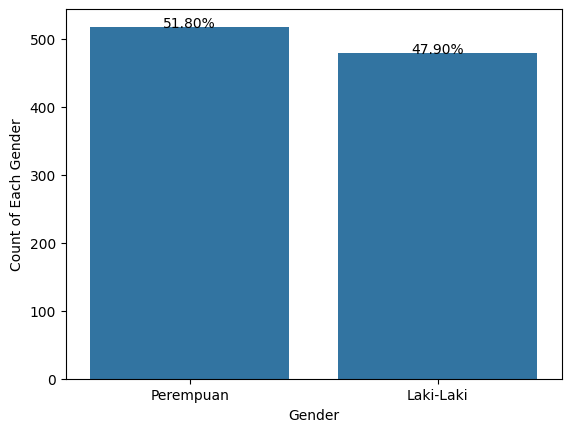

In [43]:
ax = sns.countplot(data=df, x='Gender')

# Calculate the percentage for each category
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1,
            '{:.2f}%'.format((height / total
                              ) * 100),
            ha="center")
plt.ylabel('Count of Each Gender')
plt.show()

> Imputation method based on distribution :

- Daily Time Spent on Site and Daily Internet Usage : mean
- Area Income : median
- Gender : mode

In [50]:
# Impute missing values
df['Daily Time Spent on Site'] = df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Daily Internet Usage'] = df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Area Income'] = df['Area Income'].fillna(df['Area Income'].median())
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

# EDA

In [51]:
desc_col = []

for col in df.columns :
    desc_col.append([col, df[col].dtype, df[col].isna().sum(), round(df[col].isna().sum()/len(df) * 100, 2), df.duplicated().sum(), df[col].nunique(), df[col].unique()[:5]])

desc_df = pd.DataFrame(data=desc_col, columns='Feature, Data Type, Null Values, Null Percentage, Duplicated Values, Unique Values, 5 Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null Values,Null Percentage,Duplicated Values,Unique Values,5 Unique Sample
0,Daily Time Spent on Site,float64,0,0.0,0,891,"[68.95, 80.23, 69.47, 74.15, 68.37]"
1,Age,int64,0,0.0,0,43,"[35, 31, 26, 29, 23]"
2,Area Income,float64,0,0.0,0,987,"[432837300.0, 479092950.00000006, 418501580.0, 383643260.0, 517229930.00000006]"
3,Daily Internet Usage,float64,0,0.0,0,956,"[256.09, 193.77, 236.5, 245.89, 225.58]"
4,Gender,object,0,0.0,0,2,"[Perempuan, Laki-Laki]"
5,Visit Time,datetime64[ns],0,0.0,0,997,"[2016-03-27 00:53:00, 2016-04-04 01:39:00, 2016-03-13 20:35:00, 2016-01-10 02:31:00, 2016-06-03 03:36:00]"
6,City,object,0,0.0,0,30,"[Jakarta Timur, Denpasar, Surabaya, Batam, Medan]"
7,Province,object,0,0.0,0,16,"[Daerah Khusus Ibukota Jakarta, Bali, Jawa Timur, Kepulauan Riau, Sumatra Utara]"
8,Category,object,0,0.0,0,10,"[Furniture, Food, Electronic, House, Finance]"
9,Clicked on Ad,object,0,0.0,0,2,"[No, Yes]"


- Categorical columns (10 columns): 
    - `Gender` : nominal
    - `City` : nominal
    - `Province` : nominal
    - `Category` : nominal
    -  `Clicked on Ad` : nominal (Binary 0 & 1)

- Numerical/Continuous columns (18 columns) :

    - `Daily Time Spent on Site, Age, Area Income, Daily Internet Usage`

- Date column (1 column) :
    -  `Visit Time`

In [52]:
# Grouping columns based on data types
nums_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

cats_cols = ['Gender', 'City', 'Province', 'Category', 'Clicked on Ad']

date_cols = ['Visit Time']

## Statistical Summary

In [59]:
?df.describe

Signature: df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the r

In [58]:
# Numerical columns

nums_summary = df[nums_cols].describe().transpose()
nums_summary['coefficient of variation'] = nums_summary['std'] / nums_summary['mean']
nums_summary['range'] = nums_summary['max'] - nums_summary['min']

nums_summary

,count,mean,std,min,25%,50%,75%,max,coefficient of variation,range
Daily Time Spent on Site,1000.0,6.492952e+01,1.574127e+01,32.60,5.154500e+01,6.778000e+01,7.835250e+01,9.143000e+01,0.242436,5.883000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01,0.243982,4.200000e+01
Area Income,1000.0,3.850493e+08,9.347971e+07,97975500.00,3.298201e+08,3.990683e+08,4.566932e+08,5.563936e+08,0.242773,4.584181e+08
Daily Internet Usage,1000.0,1.798636e+02,4.362795e+01,104.78,1.390175e+02,1.810650e+02,2.182875e+02,2.670100e+02,0.242561,1.622300e+02


In [62]:
cats_summary.value_counts()

count  unique  top                            freq
1000   2       No                             500     1
               Perempuan                      521     1
       10      Otomotif                       112     1
       16      Daerah Khusus Ibukota Jakarta  253     1
       30      Surabaya                       64      1
Name: count, dtype: int64

In [73]:
df[col].value_counts().idxmin()

'No'

In [69]:
# Categorical columns
cats_summary = df[cats_cols].describe().transpose()

cats_summary['freq_bottom'] = [df[col].value_counts().min() for col in cats_cols]
cats_summary['bottom'] = [df[col].value_counts().idxmin() for col in cats_cols]

cats_summary

,count,unique,top,freq,freq_bottom,bottom
Gender,1000,2,Perempuan,521,479,Laki-Laki
City,1000,30,Surabaya,64,11,Serang
Province,1000,16,Daerah Khusus Ibukota Jakarta,253,12,Kalimantan Barat
Category,1000,10,Otomotif,112,90,Bank
Clicked on Ad,1000,2,No,500,500,No


In [72]:
# Assuming cats_cols is a list of categorical column names in your DataFrame

# Calculate frequency counts and corresponding categories for each category in each categorical column
freq_counts = {}
bottom_categories = {}
for col in cats_cols:
    value_counts = df[col].value_counts()
    freq_counts[col] = value_counts.min()
    bottom_categories[col] = value_counts.idxmin()

# Create the categorical summary DataFrame
cats_summary = df[cats_cols].describe().transpose()

# Add the 'freq_bottom' and 'bottom' columns
cats_summary['bottom'] = [bottom_categories[col] for col in cats_cols]
cats_summary['freq_bottom'] = [freq_counts[col] for col in cats_cols]

cats_summary


,count,unique,top,freq,bottom,freq_bottom
Gender,1000,2,Perempuan,521,Laki-Laki,479
City,1000,30,Surabaya,64,Serang,11
Province,1000,16,Daerah Khusus Ibukota Jakarta,253,Kalimantan Barat,12
Category,1000,10,Otomotif,112,Bank,90
Clicked on Ad,1000,2,No,500,No,500


In [65]:
freq_counts

{'Gender': 479,
 'City': 11,
 'Province': 12,
 'Category': 90,
 'Clicked on Ad': 500}

In [29]:
?df.describe

Signature: df.describe(percentiles=None, include=None, exclude=None) -> 'Self'
Docstring:
Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

Analyzes both numeric and object series, as well
as ``DataFrame`` column sets of mixed data types. The output
will vary depending on what is provided. Refer to the notes
below for more detail.

Parameters
----------
percentiles : list-like of numbers, optional
    The percentiles to include in the output. All should
    fall between 0 and 1. The default is
    ``[.25, .5, .75]``, which returns the 25th, 50th, and
    75th percentiles.
include : 'all', list-like of dtypes or None (default), optional
    A white list of data types to include in the result. Ignored
    for ``Series``. Here are the options:

    - 'all' : All columns of the input will be included in the output.
    - A list-like of dtypes : Limits the r

In [28]:
    # Date columns
df[date_cols].describe().transpose()

,count,mean,min,25%,50%,75%,max
Visit Time,1000,2016-04-10 10:33:36.840000,2016-01-01 02:52:00,2016-02-18 02:55:15,2016-04-07 17:27:00,2016-05-31 03:18:00,2016-07-24 00:22:00


## Univariate Analysis

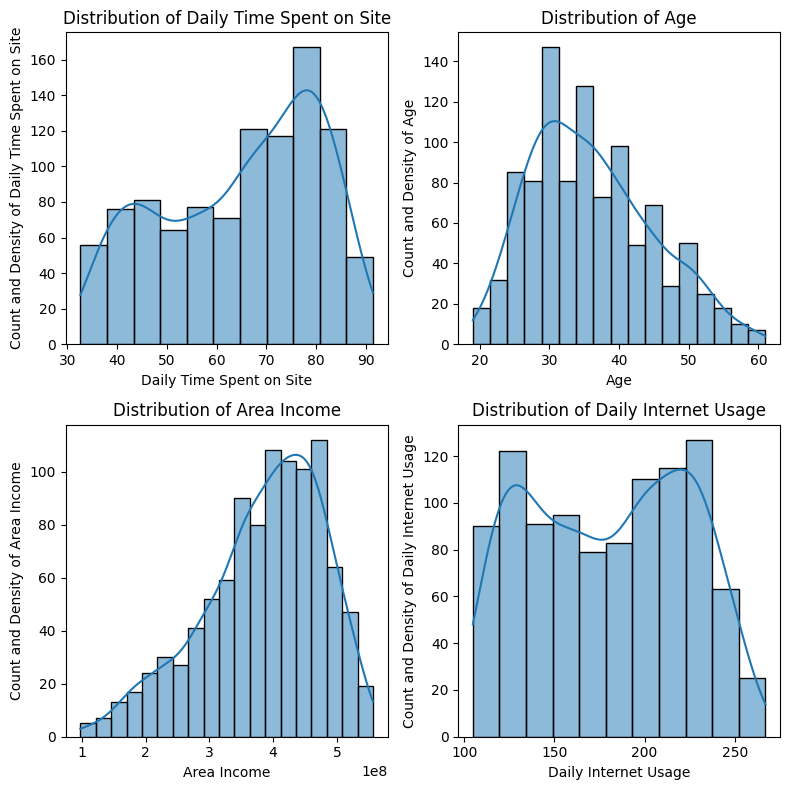

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax = ax.flatten()

for i, col in enumerate(nums_cols) :
    sns.histplot(data=df, x=col, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_ylabel(f'Count and Density of {col}')
    ax[i].set_xlabel(f'{col}')

plt.tight_layout()
plt.show()

In [25]:
# Distribution categorization
from scipy.stats import skew
from scipy.stats import kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in nums_cols :
    data = df[column]
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]

    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    # Distribution conditions for normal and skewed
    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":nums_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# Distribution conditions for uniform and bimodal
dist.loc[dist['Column Name'].isin(['Daily Internet Usage']), 'Type of Distribution'] = 'Uniform Distribution'
dist.loc[dist['Column Name'].isin(['Column Name']), 'Type of Distribution'] = 'Bimodal Distribution'

dist

,Column Name,Skewness,Kurtosis,Type of Distribution
0,Daily Time Spent on Site,-0.372,-1.074,Moderately Normal Distribution (Symmetric)
1,Age,0.478,-0.405,Moderately Normal Distribution (Symmetric)
2,Area Income,-0.653,-0.079,Moderately Normal Distribution (Symmetric)
3,Daily Internet Usage,-0.032,-1.258,Uniform Distribution


Distribution types of each numerical column can be seen in above dataframe, that is almost all of them are categorized as normal distribution. 

## Bivariate/Multivariate Analysis